**Task:
Develop an SVM for classifying between male and female voices.** 

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
files.upload()

Saving voice.xlsx to voice.xlsx


**Reading file**

In [ ]:
data = pd.read_excel('voice.xlsx')

Exploring given dataset

In [ ]:
data.shape

(3168, 21)

In [ ]:
data.iloc[:10]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


Checking data types in dataset

In [ ]:
data.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

Checking for null values

In [ ]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

Preprocessing Data

Using sklearn.preprocessing.LabelEncoder

**Purpose:**
Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

Encode target labels with value between 0 and n_classes-1.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
lab_enc = LabelEncoder().fit(data.label)

In [ ]:
y = lab_enc.transform(data.label)

In [ ]:
X = data.drop('label', axis = 1)

**sklearn.preprocessing.StandardScaler**

class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 23, shuffle = True) 

**sklearn.svm.SVC**

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

**SVC-Support Vector Classification.**

The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C = 1.1, kernel = 'sigmoid', gamma = 'auto', coef0 = 0.1, class_weight='balanced', random_state=23)

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=23, shrinking=True, tol=0.001,
    verbose=False)

**Predicting Values**

In [ ]:
y_pred = svc.predict(X_val)

**sklearn.metrics.roc_auc_score**

sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

**Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.**

Note: this implementation can be used with binary, multiclass and multilabel classification, but some restrictions apply (see Parameters).

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
print('F1 score: {0}'.format(f1_score(y_val, y_pred)))

F1 score: 0.771513353115727


In [ ]:
print('ROC AUC: {0}'.format(roc_auc_score(y_val, y_pred)))

ROC AUC: 0.7568292878314508


**sklearn.metrics.confusion_matrix**

sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)

**Compute confusion matrix to evaluate the accuracy of a classification.**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat = confusion_matrix(y_val, y_pred)

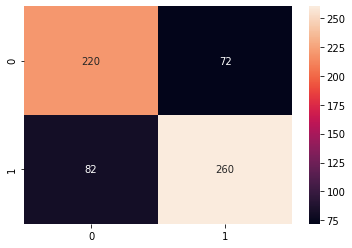

In [ ]:
sns.heatmap(conf_mat,fmt='', annot = True)

**sklearn.metrics.roc_curve**

sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

**Compute Receiver operating characteristic (ROC)**

Note: this implementation is restricted to the binary classification task.

In [ ]:
from sklearn.metrics import roc_curve

**Displaying Curve**

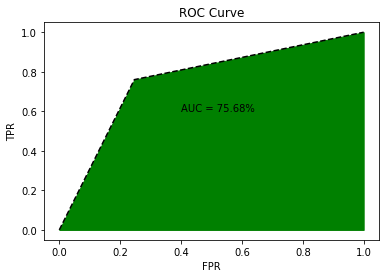

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
plt.plot(fpr, tpr, 'k--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.annotate(s='AUC = {0:0.2f}%'.format(roc_auc_score(y_val, y_pred)*100), xy=(0.4, 0.6))
plt.fill_between(fpr, tpr, color='g')
plt.show()